In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names for reference
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 773s 5us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])


C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [5]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.3566 - loss: 1.7437 - val_accuracy: 0.5586 - val_loss: 1.2290
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5764 - loss: 1.1962 - val_accuracy: 0.6320 - val_loss: 1.0463
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6516 - loss: 1.0037 - val_accuracy: 0.6288 - val_loss: 1.0400
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6856 - loss: 0.8902 - val_accuracy: 0.6649 - val_loss: 0.9495
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7201 - loss: 0.8031 - val_accuracy: 0.6884 - val_loss: 0.8977
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7381 - loss: 0.7428 - val_accuracy: 0.7094 - val_loss: 0.8415
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7565 - loss: 0.6937 - val_accuracy: 0.7040 - val_loss: 0.8572
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7729 -

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 3s - 11ms/step - accuracy: 0.7139 - loss: 0.8752

Test accuracy: 0.7139000296592712


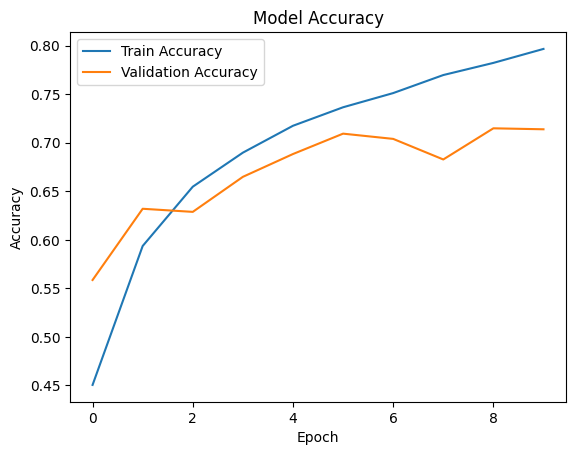

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


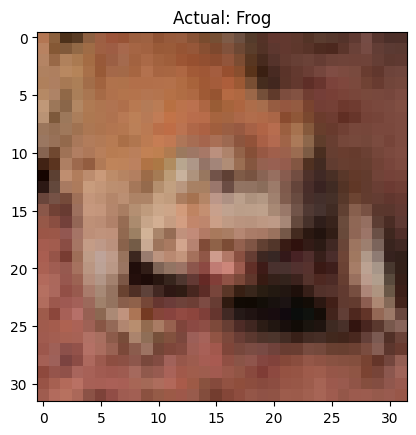

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted: Frog


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Pick a test image
index = 5  # You can change this to test different images
test_img = x_test[index]
plt.imshow(test_img)
plt.title("Actual: " + class_names[y_test[index][0]])
plt.show()

# Preprocess and predict
img_array = np.expand_dims(test_img, axis=0)  # Shape it for prediction
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print("Predicted:", predicted_class)


In [9]:
from tensorflow.keras.preprocessing import image

# Load your own image (make sure it’s 32x32 or resized to it)
img_path = 'pexels-pixabay-257540.jpg'  # Path to your test image
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Class: Airplane
